In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# **Carregando a base de dados (Congrecional_votting):**

In [19]:
# nomeando as colunas da base de dados
colunas = [
    'classe', 'resposta_1', 'resposta_2', 'resposta_3', 'resposta_4', 'resposta_5',
    'resposta_6', 'resposta_7', 'resposta_8', 'resposta_9', 'resposta_10',
    'resposta_11', 'resposta_12', 'resposta_13', 'resposta_14', 'resposta_15', 'resposta_16'
]

# Carregando os dados da base de dados:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(url, names=colunas)

In [20]:
# Exibição das 5 primeiras linhas da base de dados
df.head()

,classe,resposta_1,resposta_2,resposta_3,resposta_4,resposta_5,resposta_6,resposta_7,resposta_8,resposta_9,resposta_10,resposta_11,resposta_12,resposta_13,resposta_14,resposta_15,resposta_16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [21]:
# Exibição das 5 ultimas linhas da base de dados
df.tail()

,classe,resposta_1,resposta_2,resposta_3,resposta_4,resposta_5,resposta_6,resposta_7,resposta_8,resposta_9,resposta_10,resposta_11,resposta_12,resposta_13,resposta_14,resposta_15,resposta_16
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


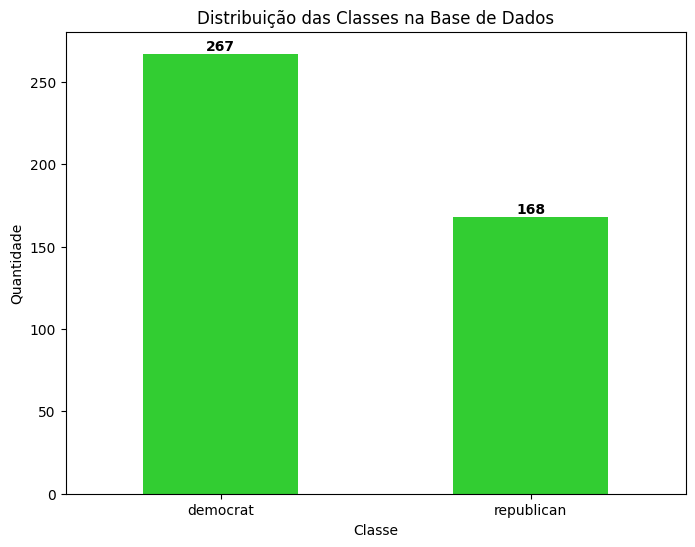

In [23]:
# Contagem da quantidade de casos recorrentes e não recorrentes na base de dados
contagem_classes = df['classe'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = contagem_classes.plot(kind='bar', color='#32CD32')

# Adicionando os valores exatos em cima das barras
for i, v in enumerate(contagem_classes):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

plt.title("Distribuição das Classes na Base de Dados")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)  # Deixa os rótulos das classes na horizontal
plt.show()

# **Divisão dos dados para treino e teste:**

In [24]:
# Embaralhando e redefinindo os índices dos dados na base de dados
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculando o tamanho dos conjuntos de treino e teste
tamanho_total = len(df)
tamanho_treino = int(0.7 * tamanho_total)

# Dividindo a base de dados para treino e teste
df_treino = df.iloc[:tamanho_treino]
df_teste = df.iloc[tamanho_treino:]

# Separação das características (X) e rótulos (y)
X_treino = df_treino.drop(columns=['classe'])
y_treino  = df_treino['classe']
X_teste = df_teste.drop(columns=['classe'])
y_teste = df_teste['classe']

# Exibição dos tamanhos dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(df_treino)} exemplos")
print(f"Tamanho do conjunto de teste: {len(df_teste)} exemplos")

Tamanho do conjunto de treinamento: 304 exemplos
Tamanho do conjunto de teste: 131 exemplos


# **Convertendo variáveis categóricas para númericas:**

In [25]:
# Conversão das variáveis categóricas em variáveis numéricas usando one-hot encoding
X_treino_encoded = pd.get_dummies(X_treino).astype(int)
X_teste_encoded = pd.get_dummies(X_teste).astype(int)

# Garantindo que ambas as bases (treino e teste) tenham as mesmas colunas após a conversão
X_treino_encoded, X_teste_encoded = X_treino_encoded.align(X_teste_encoded, join='left', axis=1)
X_teste_encoded = X_teste_encoded.fillna(0)  # Preenchendo possíveis valores NaN após alinhamento

# Criando um dicionário para mapear os valores categóricos para numéricos
mapeamento_classes = {"democrat": 0, "republican": 1}

# Convertendo os rótulos para valores numéricos, garantindo que não haja espaços extras
y_treino_encoded = y_treino.astype(str).str.strip().map(mapeamento_classes)
y_teste_encoded = y_teste.astype(str).str.strip().map(mapeamento_classes)

# **Verificação das conversões:**

In [26]:
y_treino.head()

0      democrat
1      democrat
2    republican
3    republican
4    republican
Name: classe, dtype: object

In [27]:
y_treino_encoded.head()

0    0
1    0
2    1
3    1
4    1
Name: classe, dtype: int64

In [28]:
X_treino.head()

,resposta_1,resposta_2,resposta_3,resposta_4,resposta_5,resposta_6,resposta_7,resposta_8,resposta_9,resposta_10,resposta_11,resposta_12,resposta_13,resposta_14,resposta_15,resposta_16
0,n,n,y,n,n,n,y,y,y,y,n,n,n,y,n,y
1,y,y,y,n,y,y,n,n,n,y,y,n,y,y,n,y
2,n,?,n,y,y,y,n,n,n,y,n,y,y,y,n,n
3,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
4,n,y,n,y,y,y,n,n,n,n,y,y,y,y,n,n


In [29]:
X_treino_encoded.head()

,resposta_1_?,resposta_1_n,resposta_1_y,resposta_2_?,resposta_2_n,resposta_2_y,resposta_3_?,resposta_3_n,resposta_3_y,resposta_4_?,...,resposta_13_y,resposta_14_?,resposta_14_n,resposta_14_y,resposta_15_?,resposta_15_n,resposta_15_y,resposta_16_?,resposta_16_n,resposta_16_y
0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0


# **Algoritmo ID3:**

In [30]:
class ArvoreDecisaoID3:
    def __init__(self):
        self.arvore = {}  # Estrutura que armazenará a árvore de decisão

    def calcular_entropia(self, dados_alvo):
        qtd_ocorrencias = dados_alvo.value_counts()       # conta a quantidade de ocorrências de cada classe
        probabilidade = qtd_ocorrencias / len(dados_alvo)

        # Calcula a entropia utilizando a fórmula
        entropia = -sum(probabilidade * probabilidade.apply(lambda p: math.log2(p) if p > 0 else 0))

        return entropia

    def calcular_ganho_informacao(self, dados, dados_alvo, atributo):
        entropia_total = self.calcular_entropia(dados_alvo)     # calcula a entropia os rótulos

        # Obtém os valores únicos para o atributo
        valores_unicos = dados[atributo].unique()
        ganho = 0

        for valor in valores_unicos:
            # Filtra o conjunto de dados para incluir apenas as linhas onde o atributo tem o valor da interação
            dados_filtrados = dados[dados[atributo] == valor]
            dados_alvo_filtrados = dados.loc[dados[atributo] == valor, dados_alvo.name]

            probabilidade_valor = len(dados_filtrados) / len(dados)
            entropia_subconjunto = self.calcular_entropia(dados_alvo_filtrados)
            ganho += probabilidade_valor * entropia_subconjunto  # Calcula o ganho total

        ganho_informacao = entropia_total - ganho
        return ganho_informacao

    def encontrar_melhor_atributo(self, dados, atributos, dados_alvo, historico_ganhos):
      # Cria um dicionário onde a chave é o atributo e o valor é o ganho de informação obtida por esse atributo
        ganhos = {}

        for atributo in atributos:
            ganho = self.calcular_ganho_informacao(dados, dados_alvo, atributo)
            ganhos[atributo] = ganho

            # Armazena o ganho no histórico (guarda em lista para calcular média depois)
            if atributo in historico_ganhos:
                historico_ganhos[atributo].append(ganho)
            else:
                historico_ganhos[atributo] = [ganho]

        melhor_atributo = max(ganhos, key=ganhos.get)    # Encontra o atributo que possuir o maior ganho de informação
        return melhor_atributo

    def construir_arvore(self, dados, atributos, dados_alvo, profundidade, max_depth, historico_ganhos):
        valores_alvo = dados_alvo.unique()

        # Segue abaixo os critérios de parada para a construção da árvore:
        # Caso base 1: se todos os exemplos pertencem à mesma classe
        if len(valores_alvo) == 1:
            return valores_alvo[0]

        # Caso base 2: se não há mais atributos para dividir
        if len(atributos) == 0:
            return dados_alvo.mode()[0]  # Retorna a classe mais frequente

        # Caso base 3: se a profundidade já atingiu a profundidade máxima
        if profundidade >= max_depth:
            return valores_alvo[0]

        # Encontra o melhor atributo para dividir
        melhor_atributo = self.encontrar_melhor_atributo(dados, atributos, dados_alvo, historico_ganhos)
        arvore = {melhor_atributo: {}}  # Inicializa a árvore com o melhor atributo

        # Remove o melhor atributo da lista de atributos
        atributos_restantes = [atributo for atributo in atributos if atributo != melhor_atributo]

        # Divide os dados e chama recursivamente para construir subárvores
        for valor in dados[melhor_atributo].unique():
            subconjunto = dados[dados[melhor_atributo] == valor]    # retorna um subconjunto de dados com as linhas que contém o valor da interação na coluna do melhor_atributo
            if len(subconjunto) == 0:
                arvore[melhor_atributo][valor] = dados_alvo.mode()[0]  # Caso não haja exemplos
            else:
                arvore[melhor_atributo][valor] = self.construir_arvore(subconjunto, atributos_restantes, subconjunto[dados_alvo.name], profundidade + 1, max_depth, historico_ganhos)

        return arvore

    def treinar(self, X_treino, y_treino, historico_ganhos):
        dados = X_treino.copy()
        dados['alvo'] = y_treino
        atributos = X_treino.columns.tolist()
        profundidade = 0               # Atribuindo a prondidade inicial da árvore (que recursivamente vai ser incrementada em construir_arvore)
        max_depth = 2
        self.arvore = self.construir_arvore(dados, atributos, dados['alvo'], profundidade, max_depth, historico_ganhos)

        # Predizendo para o conjunto de dados dados de treino e calculando a acurácia
        previsoes_treino = self.prever(X_treino)
        acuracia_treino = self.calcular_acuracia(previsoes_treino, y_treino)

        return acuracia_treino

    def prever_amostra(self, arvore, amostra):
        if not isinstance(arvore, dict):
            return arvore  # Retorna o valor da folha (classe prevista)

        atributo = list(arvore.keys())[0]  # Pega o primeiro atributo (nó de decisão)
        valor = amostra[atributo]  # Pega o valor da amostra para o atributo atual

        if valor not in arvore[atributo]:
            return None  # Retorna None se o valor não estiver na árvore

        # Chamada recursiva para o próximo nível da árvore
        return self.prever_amostra(arvore[atributo][valor], amostra)

    def prever(self, X_teste):

        previsoes = []  # Lista onde as previsões serão armazenadas

        # Itera sobre cada linha do conjunto de teste
        for _, linha in X_teste.iterrows():
            previsoes.append(self.prever_amostra(self.arvore, linha))  # Faz a predição para a linha e adiciona na lista de previsões
        return previsoes

    def calcular_acuracia(self, previsoes, y_real):
        acertos = sum(previsoes == y_real)
        return acertos / len(y_real)

# **Treinamento e acurácia:**

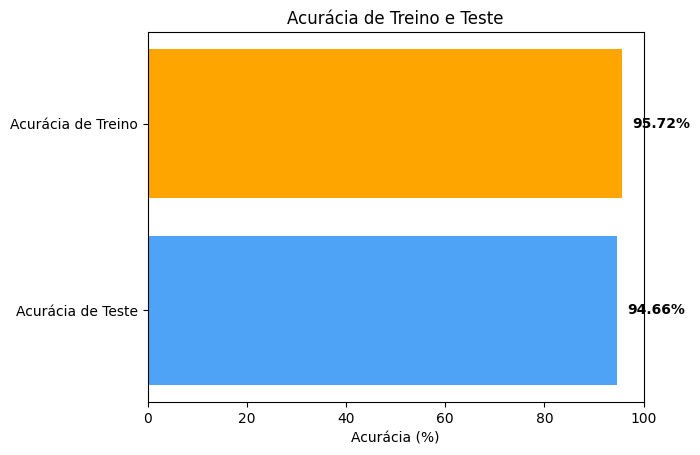

In [31]:
arvore = ArvoreDecisaoID3()
historico_ganhos = {}     # Dicionário para armazenar os ganhos dos atributos e apresentar eles posterioremente num gráfico de barras

# Treinando o modelo e obtendo a acurácia de treino
acuracia_treino = arvore.treinar(X_treino, y_treino, historico_ganhos)

# Fazendo predições no conjunto de teste e calculando a acurácia de teste
previsoes_teste = arvore.prever(X_teste)
acuracia_teste = arvore.calcular_acuracia(previsoes_teste, y_teste)

# Acurácia de treino e acurácia de teste
acuracia_treino = acuracia_treino * 100  # Convertendo para porcentagem
acuracia_teste = acuracia_teste * 100    # Convertendo para porcentagem

# Criando o gráfico de barras horizontais (invertendo a ordem)
plt.barh(['Acurácia de Teste', 'Acurácia de Treino'], [acuracia_teste, acuracia_treino], color=['#4FA3F7', 'orange'])

# Adicionando título e rótulos
plt.title('Acurácia de Treino e Teste')
plt.xlabel('Acurácia (%)')
plt.xlim(0, 100)  # Limite do gráfico de 0 a 100%

# Adicionando os valores das acurácias dentro das barras
for i, acuracia in enumerate([acuracia_teste, acuracia_treino]):
    plt.text(acuracia + 2, i, f'{acuracia:.2f}%', va='center', ha='left', color='black', fontweight='bold')

# Exibindo o gráfico
plt.show()

# **Importância dos atributos:**

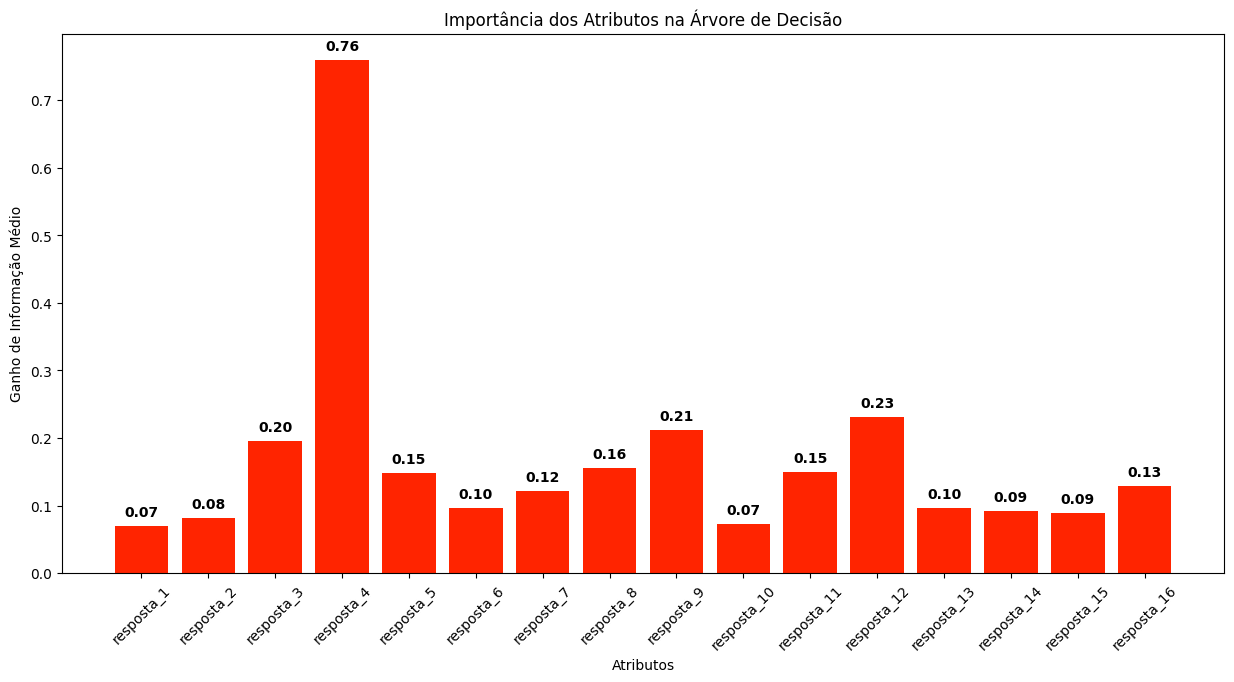

In [33]:
# Calcula a média do ganho de informação para cada atributo
importancia_atributos = {}

for atributo, ganhos in historico_ganhos.items():
    importancia_atributos[atributo] = sum(ganhos) / len(ganhos)

# Criando o gráfico de barras
plt.figure(figsize=(15, 7))
bars = plt.bar(importancia_atributos.keys(), importancia_atributos.values(), color='#FF2400')

# Adicionando os valores exatos em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontweight='bold')

plt.xlabel("Atributos")
plt.ylabel("Ganho de Informação Médio")
plt.title("Importância dos Atributos na Árvore de Decisão")
plt.xticks(rotation=45)
plt.show()

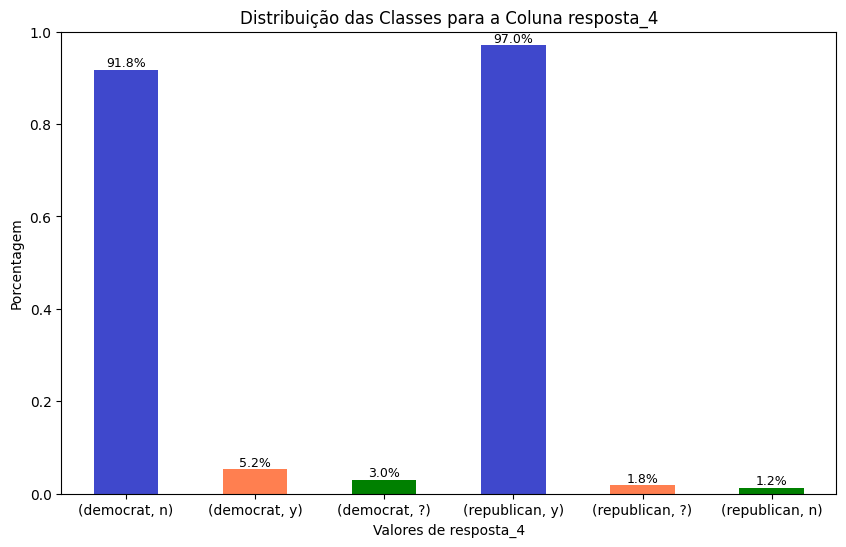

In [34]:
# Contando a distribuição das classes para a coluna 'resposta_4'
distribuicao_resposta_4 = df.groupby('classe')['resposta_4'].value_counts(normalize=True)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = distribuicao_resposta_4.plot(kind='bar', color=['#3F48CC', 'coral', 'green'])

# Adicionando os valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=9, color='black',
                xytext=(0, 5), textcoords='offset points')

# Ajustando o eixo Y para mostrar porcentagens
ax.set_ylabel('Porcentagem')
ax.set_ylim(0, 1)  # Definindo o limite superior do eixo y para 100% (1.0)

# Título e rótulos
plt.title('Distribuição das Classes para a Coluna resposta_4')
plt.xlabel('Valores de resposta_4')
plt.xticks(rotation=0)

plt.show()

# **Matriz de confusão:**

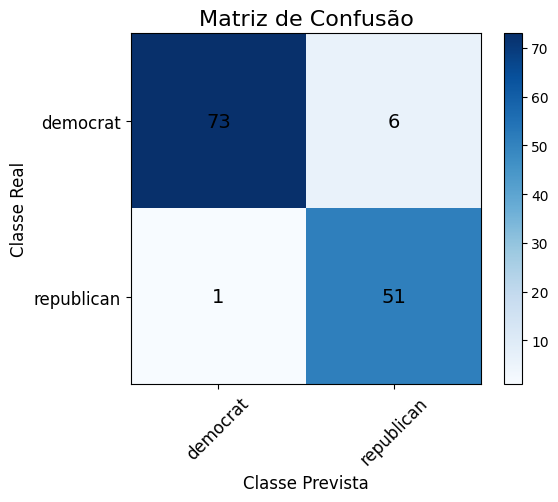

In [35]:
# Criando a matriz de confusão
cm = pd.crosstab(y_teste, previsoes_teste, rownames=['Classe Real'], colnames=['Classe Prevista'])

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))  # Tamanho da figura
plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Exibindo a imagem (matriz) com a paleta 'Blues'
plt.title('Matriz de Confusão', fontsize=16)
plt.colorbar()  # Barra de cores

# Adicionando os rótulos aos eixos e as anotações nas células
tick_marks = range(len(cm.columns))
plt.xticks(tick_marks, cm.columns, rotation=45, fontsize=12)
plt.yticks(tick_marks, cm.index, fontsize=12)

# Adicionando os valores nas células
for i in range(len(cm.columns)):
    for j in range(len(cm.index)):
        plt.text(j, i, str(cm.iloc[i, j]), ha="center", va="center", color="black", fontsize=14)

plt.xlabel('Classe Prevista', fontsize=12)
plt.ylabel('Classe Real', fontsize=12)
plt.tight_layout()  # Ajusta para não cortar nenhum elemento
plt.show()

# **Análise:**
-----------

**Prós:**
1.   Possui uma acurácia excelente tanto de treino quanto de teste.
2.   Possui um ótimo desempenho na matriz de confusão.
3.   O baixo número de valores únicos ('y', 'n', '?') presente na base de dados.
4.   Possui um atributo com um alto grau de importância.

# **Carregando a base de dados (brest_cancer):**

In [ ]:
# Nomeando colunas
colunas = [
    'classe', 'idade', 'menopausa', 'tamanho_tumor', 'linfonodos_invadidos',
    'capsula_nodal', 'grau_malignidade', 'mama', 'quadrante_mama', 'irradiacao'
]

# Carregando dados da base de dados

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data'
df = pd.read_csv(url, names=colunas)

In [ ]:
# Exibição das 5 primeiras linhas da base de dados
df.head()

# Exibição das 5 ultimas linhas da base de dados
df.tail()

In [ ]:
# Contagem da quantidade de casos recorrentes e não recorrentes na base de dados
contagem_classes = df['classe'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = contagem_classes.plot(kind='bar', color='#3F48CC')

# Adicionando os valores exatos em cima das barras
for i, v in enumerate(contagem_classes):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

plt.title("Distribuição das Classes na Base de Dados")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)  # Deixa os rótulos das classes na horizontal
plt.show()


# **Divisão dos dados para treino e teste:**

In [ ]:
# Divisão da base de dados

# Embaralhando e redefinindo os índices dos dados na base de dados
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculando o tamanho dos conjuntos de treino e teste
tamanho_total = len(df)
tamanho_treino = int(0.7 * tamanho_total)

# Dividindo a base de dados para treino e teste
df_treino = df.iloc[:tamanho_treino]
df_teste = df.iloc[tamanho_treino:]

# Separação das características (X) e rótulos (y)
X_treino = df_treino.drop(columns=['classe'])
y_treino  = df_treino['classe']
X_teste = df_teste.drop(columns=['classe'])
y_teste = df_teste['classe']

# Exibição dos tamanhos dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(df_treino)} exemplos")
print(f"Tamanho do conjunto de teste: {len(df_teste)} exemplos")

# **Convertendo variáveis categóricas para númericas:**



In [ ]:
# Conversão das variáveis categóricas em variáveis numéricas usando one-hot encoding
X_treino_encoded = pd.get_dummies(X_treino).astype(int)
X_teste_encoded = pd.get_dummies(X_teste).astype(int)

# Garantindo que ambas as bases (treino e teste) tenham as mesmas colunas após a conversão
X_treino_encoded, X_teste_encoded = X_treino_encoded.align(X_teste_encoded, join='left', axis=1)
X_teste_encoded = X_teste_encoded.fillna(0)  # Preenchendo possíveis valores NaN após alinhamento

# Criando um dicionário para mapear os valores categóricos para numéricos
mapeamento_classes = {"no-recurrence-events": 0, "recurrence-events": 1}

# Convertendo os rótulos para valores numéricos, garantindo que não haja espaços extras
y_treino_encoded = y_treino.astype(str).str.strip().map(mapeamento_classes)
y_teste_encoded = y_teste.astype(str).str.strip().map(mapeamento_classes)


# **Verificação das conversões:**

In [ ]:
# Verificando se a conversão foi feita corretamente
print("Exemplo de rótulos antes da conversão:")
y_treino.head()

In [ ]:
print("\nExemplo de rótulos após a conversão:")
y_treino_encoded.head()

In [ ]:
X_treino.head()

In [ ]:
X_treino_encoded.head()

# **Treinamento e acurácia:**

In [ ]:
arvore = ArvoreDecisaoID3()
historico_ganhos = {}     # Dicionário para armazenar os ganhos dos atributos e apresentar eles posterioremente num gráfico de barras

# Treinando o modelo e obtendo a acurácia de treino
acuracia_treino = arvore.treinar(X_treino, y_treino, historico_ganhos)

# Fazendo predições no conjunto de teste e calculando a acurácia de teste
previsoes_teste = arvore.prever(X_teste)
acuracia_teste = arvore.calcular_acuracia(previsoes_teste, y_teste)

# Acurácia de treino e acurácia de teste
acuracia_treino = acuracia_treino * 100  # Convertendo para porcentagem
acuracia_teste = acuracia_teste * 100    # Convertendo para porcentagem

# Criando o gráfico de barras horizontais (invertendo a ordem)
plt.barh(['Acurácia de Teste', 'Acurácia de Treino'], [acuracia_teste, acuracia_treino], color=['#4FA3F7', 'orange'])

# Adicionando título e rótulos
plt.title('Acurácia de Treino e Teste')
plt.xlabel('Acurácia (%)')
plt.xlim(0, 100)  # Limite do gráfico de 0 a 100%

# Adicionando os valores das acurácias dentro das barras
for i, acuracia in enumerate([acuracia_teste, acuracia_treino]):
    plt.text(acuracia + 2, i, f'{acuracia:.2f}%', va='center', ha='left', color='black', fontweight='bold')

# Exibindo o gráfico
plt.show()

# **Importância dos atributos:**

In [ ]:
# Calcula a média do ganho de informação para cada atributo
importancia_atributos = {}

for atributo, ganhos in historico_ganhos.items():
    importancia_atributos[atributo] = sum(ganhos) / len(ganhos)

# Criando o gráfico de barras
plt.figure(figsize=(15, 7))
bars = plt.bar(importancia_atributos.keys(), importancia_atributos.values(), color='#FF2400')

# Adicionando os valores exatos em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontweight='bold')

plt.xlabel("Atributos")
plt.ylabel("Ganho de Informação Médio")
plt.title("Importância dos Atributos na Árvore de Decisão")
plt.xticks(rotation=45)
plt.show()

# **Matriz de confusão:**

In [ ]:
# Criando a matriz de confusão
cm = pd.crosstab(y_teste, previsoes_teste, rownames=['Classe Real'], colnames=['Classe Prevista'])

# Plotando a matriz de confusão
plt.figure(figsize=(7, 6))  # Tamanho da figura
plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Exibindo a imagem (matriz) com a paleta 'Blues'
plt.title('Matriz de Confusão', fontsize=16)
plt.colorbar()  # Barra de cores

# Adicionando os rótulos aos eixos e as anotações nas células
tick_marks = range(len(cm.columns))
plt.xticks(tick_marks, cm.columns, rotation=45, fontsize=12)
plt.yticks(tick_marks, cm.index, fontsize=12)

# Adicionando os valores nas células
for i in range(len(cm.columns)):
    for j in range(len(cm.index)):
        plt.text(j, i, str(cm.iloc[i, j]), ha="center", va="center", color="black", fontsize=14)

plt.xlabel('Classe Prevista', fontsize=12)
plt.ylabel('Classe Real', fontsize=12)
plt.tight_layout()  # Ajusta para não cortar nenhum elemento
plt.show()

# **Análise:**
-----------

**Prós:**
1.   Possui um equilíbrio aceitável da acurácia de teste comparada com a de treino.
2.   Obteve um desempenho aceitável na matriz de confusão, sobretudo nos casos não recorrentes.

**Contras:**
1.   O modelo precisa ter um nível de profundidade baixo para obter um desempeno razoável nas previsões.
2.   possui dificuldade em prever casos recorrentes.


**Desafios:**
1. Desbalanceamento de dados.
2. Complexidade e alto de número de valores únicos.